In [340]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [341]:
class NeuralNetwork:
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = { }
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
                
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        
    def softmax(self,a):
        e_a = np.exp(a)
        ans = e_a/np.sum(e_a,axis=1,keepdims=True)
        return ans
    
    def forward(self,X):
        z1 = np.dot(X,self.model['W1']) + self.model['b1']
        a1 = np.tanh(z1)
        
        z2 = np.dot(a1,self.model['W2']) + self.model['b2']
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,self.model['W3']) + self.model['b3']
        
        y_pred = self.softmax(z3) 
        self.activation = (a1,a2,y_pred)
        return y_pred
    
    def backward(self,X,y,lr=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        a1,a2,y_pred = self.activation
        
        delta3 = y_pred-y
        
        m = float(X.shape[0])
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2)) * np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis = 0)
        
        delta1 = (1-np.square(a1)) * np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        self.model["W1"] -=lr * dw1
        self.model["b1"] -=lr * db1
        
        self.model["W2"] -=lr * dw2
        self.model["b2"] -=lr * db2
        
        self.model["W3"] -=lr * dw3
        self.model["b3"] -=lr * db3
        
    def predict(self,X):
        y_out = self.forward(X)
        return np.argmax(y_out,axis = 1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1,b2,b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        a1,a2,y_pred = self.activation
        
        print("W1 ",W1.shape)
        print("a1 ",a1.shape)
        
        print("W2 ",W2.shape)
        print("a2 ",a2.shape)
        
        print("W3 ",W3.shape)
        print("a3 ",y_pred.shape)
        
    def loss(self,y_hot,p):
        l = -np.mean(y_hot * np.log(p))
        return l
    
    def oneHotVector(self,y,depth):
        m = y.shape[0]
        y_hot = np.zeros((m,depth))
        
        y_hot[np.arange(m),y] = 1
        return y_hot

In [342]:
X,y = make_circles(n_samples=500,shuffle=True,noise= 0.2,random_state=1,factor=0.2)

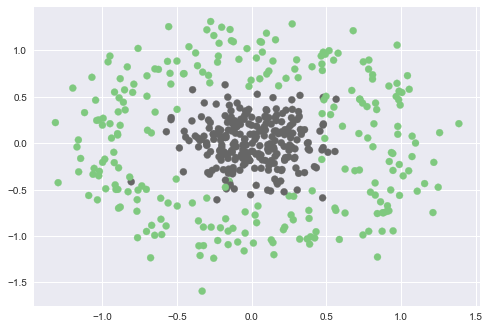

In [343]:
plt.scatter(X[:,0],X[:,1],c=y,cmap = plt.cm.Accent)
plt.show()

In [344]:
model = NeuralNetwork(input_size=2,layers=[10,5],output_size=2)

In [345]:
def train(X,y,model,epochs,lr,logs=True):
    training_loss = []
    classes = 2
    y_hot = model.oneHotVector(y,classes)
    
    for i in range(epochs):
        y_pred = model.forward(X)
        l  = model.loss(y_hot,y_pred)
        training_loss.append(l)
        
        model.backward(X,y_hot,lr)
    return training_loss

In [346]:
loss_list = train(X,y,model,500,0.001)

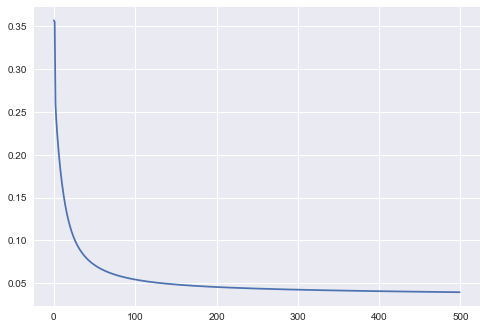

In [347]:
plt.plot(loss_list)
plt.show()

In [348]:
model.summary()

W1  (2, 10)
a1  (500, 10)
W2  (10, 5)
a2  (500, 5)
W3  (5, 2)
a3  (500, 2)


In [365]:
from visualize import plot_decision_boundary

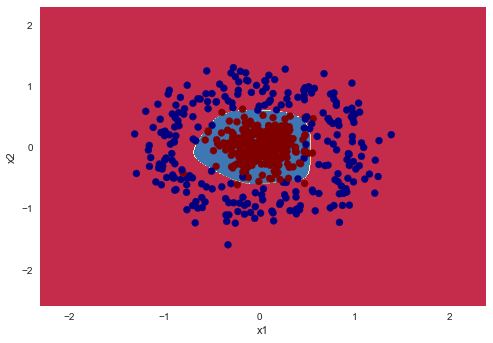

In [366]:
plot_decision_boundary(lambda x:model.predict(x),X,y)

In [367]:
y_pred = model.predict(X)
print((np.mean(y_pred==y))*100)

97.0
